# Author :Ankitha N. Pawar

# Task #6 :-Prediction using Decision Tree  Algorithm

The purpose is if we feed any new data to this classifier, it would be able to 
predict the right class accordingly. 

# DataSet: Iris Dataset

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,confusion_matrix 

# Loading the dataset


In [2]:
data = pd.read_csv(r"C:\Users\Shivpratap\Downloads\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# dropped the ID column from data set
data.drop(['Id'],axis =1,inplace =True)

In [6]:
# checking for statistical information of dataset
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# checking for duplicated values
data[data.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
# removed the duplicated values
data.drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Observations:

 

This the Iris Flower data set where there are 150 rows and 5 columns are present.

1.Shape of data set is(150,5).

2.There are 4 columns in float dtype and 1 in object dtype.

3.Removed the Duplicated Id ROW.

4.Null values are not present in our dataset.

5.There are 3 duplicated values which have been removed.

shape of the dataset is reduced to 147 after removing the duplicated.

# Exploratory Data Analysis 

<AxesSubplot:>

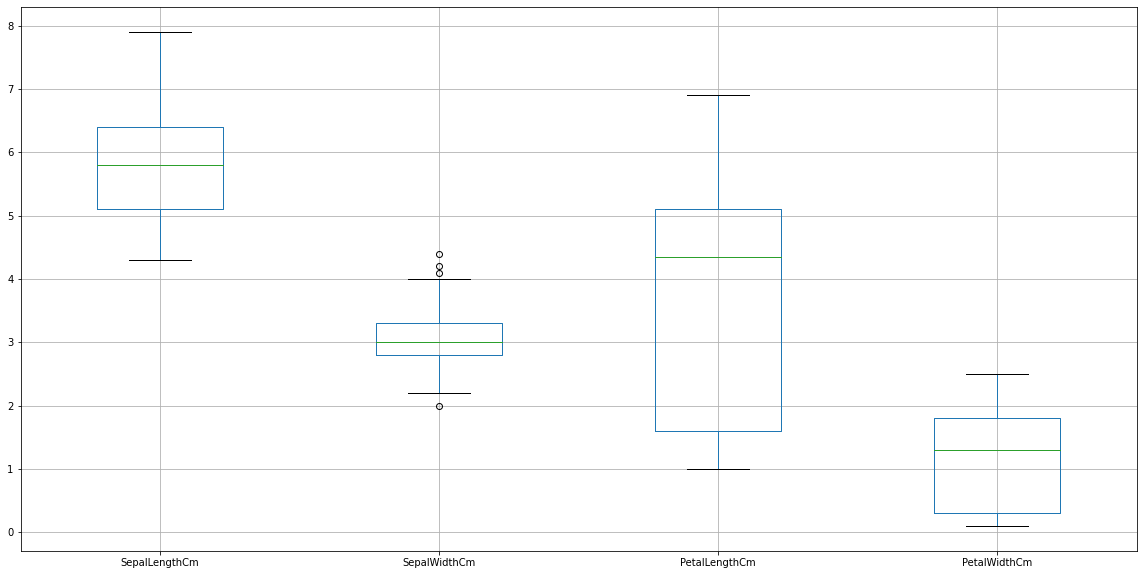

In [10]:
# checking for outliers
plt.figure(figsize =(20,10))
data.boxplot()

In [11]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# count of categorical data in target column
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

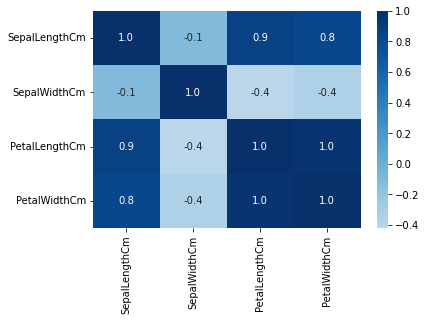

In [13]:
# heatmap for to find correlation between columns
sns.heatmap(data.corr(),annot = True,fmt ='0.1f',center=0, cmap='Blues')

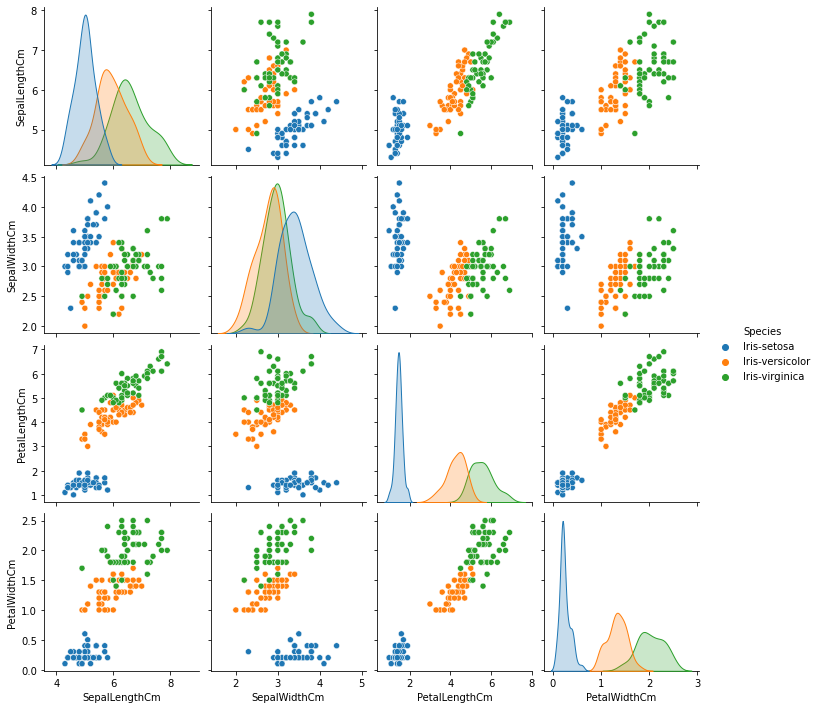

In [14]:
sns.pairplot(data,hue='Species')

C:\Users\Shivpratap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

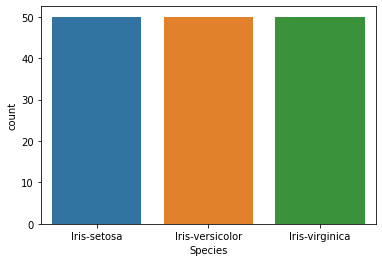

In [15]:
sns.countplot(data['Species'])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

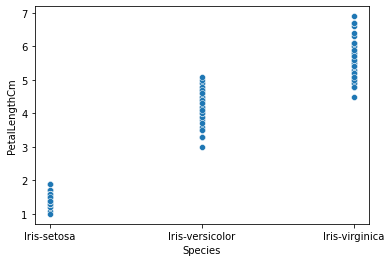

In [16]:
sns.scatterplot(x='Species',y='PetalLengthCm',data =data)

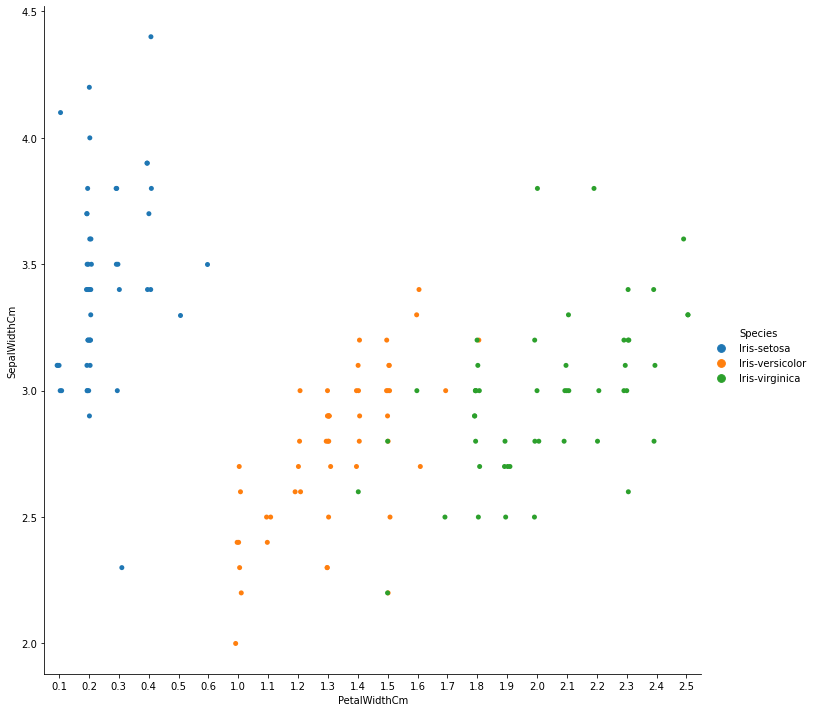

In [17]:
sns.catplot(x="PetalWidthCm",y = 'SepalWidthCm',data=data,hue = 'Species',height=10)
plt.show()

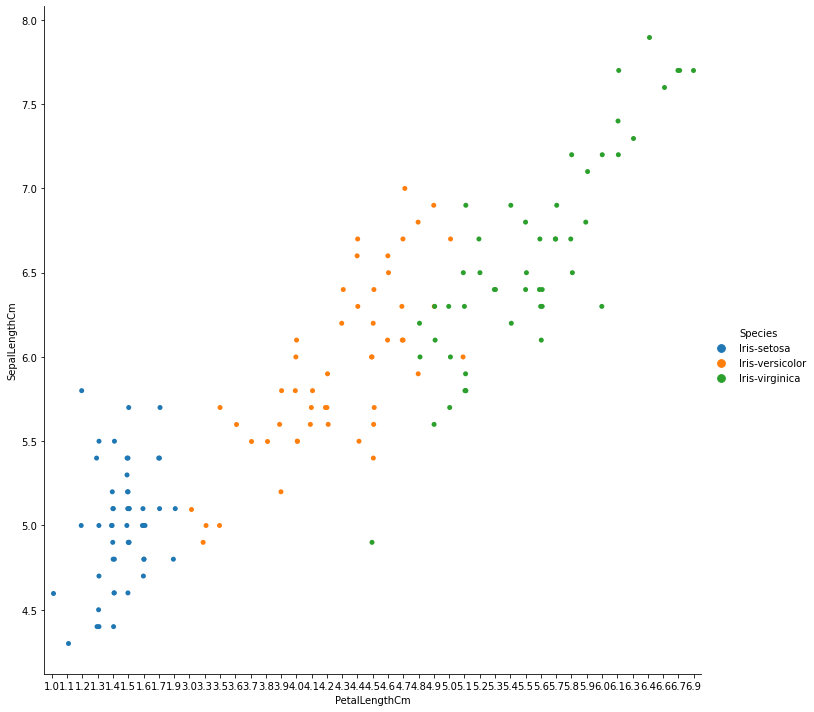

In [18]:
sns.catplot(x="PetalLengthCm",y = 'SepalLengthCm',data=data,hue = 'Species',height=10)
plt.show()

# Observations:

I have done Exploratory Data Analysis on iris data set.

1.Our Data set does not contains Outliers that effects our prediction. 

2.Our Target Varible count have equal value counts.
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50

3.By Using Heatmap, there are some columns are highly dependent on each other such as  column "SepalLengthCm" depends on "PatelLengthCm" and "PatelWidthCm".

# Model Building

In [20]:
# Defining the X & y variables
X = data.drop("Species",axis = 1)
y =data['Species']

In [21]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [23]:
# feature scaling
ss = StandardScaler()
X = ss.fit_transform(X) 
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [25]:
X.shape,X_train.shape,X_test.shape

((150, 4), (112, 4), (38, 4))

In [26]:
# Creating instance of the algorithm 
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
# predicting the model
y_pred = decisiontree.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [28]:
df=pd.DataFrame({"Actual":y_test,"Decision Tree":y_pred})
df

,Actual,Decision Tree
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [29]:
# Calculating the accuracy score
accuracy_score(y_test,y_pred)*100

100.0

In [30]:
confusion_matrix(y_test,y_pred)*100

array([[1500,    0,    0],
       [   0, 1100,    0],
       [   0,    0, 1200]], dtype=int64)

# Testing the Model By giving some data

In [31]:
data.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
new_data = {"SepalLengthCm":5.0,
           'SepalWidthCm':3.4,
           'PetalLengthCm':1.5,
            'PetalWidthCm':0.2}

new = pd.DataFrame(new_data,index = [0])
new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.4,1.5,0.2


In [33]:
new_pred = decisiontree.predict(new)
new_pred

C:\Users\Shivpratap\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

# Observations:

1.Created a Model which has 100% Accuracy Score.

2.Predicted with new data.

This Model Good to use on this Iris Data set.

The purpose to make this if we feed any new data to this classifier, it would be able to 
predict the right class accordingly. 


# Save Model using joblib

In [34]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X,y)

DecisionTreeClassifier()

In [35]:
import joblib

In [36]:
joblib.dump(decisiontree,"model_joblib_decision")

['model_joblib_decision']

In [37]:
model =joblib.load('model_joblib_decision')

In [38]:
model.predict(new)

C:\Users\Shivpratap\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

# GUI

In [39]:
from tkinter import *

In [40]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    
    model = joblib.load('model_joblib_decision')
    result = model.predict([[p1,p2,p3,p4]])
    
    Label(master,text = " IRIS flower ").grid(row=5)
    Label(master,text = result).grid(row =8)
      



master =Tk()
master.title("IRIS flower prediction")
label = Label(master,text = '****IRIS flower prediction****',bg = 'blue',
             fg = 'white').grid(row= 0,columnspan = 5)

Label(master,text= 'Enter SepalLengthCm ').grid(row = 1)
Label(master,text= 'Enter SepalWidthCm ').grid(row = 2)
Label(master,text= 'Enter PetalLengthCm ').grid(row = 3)
Label(master,text= 'Enter PetalWidthCm ').grid(row = 4)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)

Button(master,text="Predict",command = show_entry).grid()

mainloop()